# Load Balancing Problem

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Exercise 3-1

Create two examples where the obtained makespan T is always
the same as T * . (Easy examples for the greedy algorithm).

In [2]:
def greedy_solution(m, jobs: list[(str, int)]):
    """
         Attributes
        ----------
        m : int
            machine size
        jobs: list[int]
            job list
    """
    assigned = [[] for i in range(m)]
    L = [0] * m
    for j, (name, t) in enumerate(jobs):
        i = np.argmin(L)
        assigned[i].append((name, t))
        L[i] = L[i] + t

    return assigned, max(L)

def gen_equal_jobs(num, t, prefix="J"):
    jobs = []
    for i in range(num): 
        jobs.append((f"{prefix}_{i+1}", t))
    return jobs

equal_jobs = gen_equal_jobs(4, 2)


equal_jobs_assigned, equal_jobs_T = greedy_solution(2, equal_jobs)

2 2
['J_1', 'J_3'] [2, 2] [0, 2]
['J_2', 'J_4'] [2, 2] [0, 2]


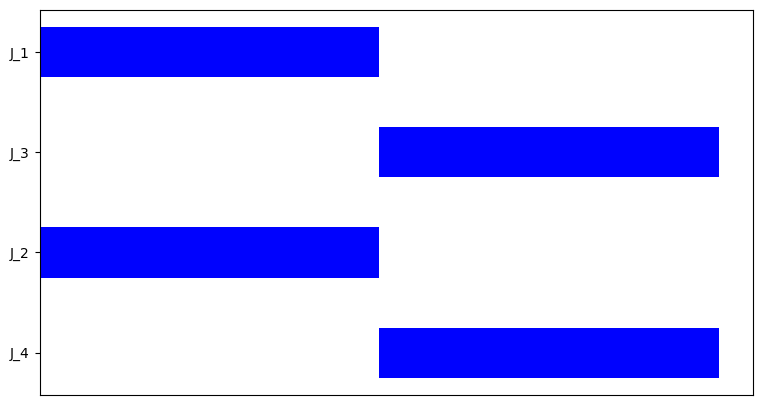

In [26]:



def survey(assigned: list(list((str, int)))):
    """
    Parameters
    ----------
    """
    labels = [f"Machine {i}" for i in range(len(assigned))]
    t = [[job[1] for job in assigned_jobs] for assigned_jobs in assigned]
    min, max = np.min(t), np.max(t)
    def n2c(vals):
        mpl.colormaps
    
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    # ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, assigned_jobs in enumerate(assigned):
        labels = [job[0] for job in assigned_jobs]
        widths = [job[1] for job in assigned_jobs]
        starts = [sum(widths[:i]) for i in range(len(assigned_jobs))]
        print(labels, widths, starts)
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=labels[i], color=n2c(widths))

    #     r, g, b, _ = color
    #     text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    #     ax.bar_label(rects, label_type='center', color=text_color)
    # ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
    #           loc='lower left', fontsize='small')

    return fig, ax


survey(equal_jobs_assigned)
plt.show()